In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [5]:
# Loading the Financial Dataset
fin_data = pd.read_csv("compustat_2000_clean.csv", na_values = ["NA", "na", "?"], low_memory = False)

In [17]:
fin_data = fin_data.dropna(axis=1)
fin_data.shape

(235996, 301)

In [19]:
# Define the selected 10 variables
selected_columns = ["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"]

# Slice the DataFrame to include only these columns
fin_data_selected = fin_data[selected_columns]

# Display the first few rows
print(fin_data_selected.head())

        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga  
0  96.077  
1  85.037  
2  78.845  
3  81.165  
4  87.902  


In [77]:
X = fin_data_selected  # Feature matrix
y = fin_data["ggroup"]  # Target vector
feature_names = fin_data_selected.columns
gics_mapping = {
    2010.0: "Capital Goods",
    2030.0: "Transportation",
    4520.0: "Technology Hardware & Equipment",
    2020.0: "Commercial & Professional Services",
    3510.0: "Health Care Equipment & Services",
    3520.0: "Pharmaceuticals, Biotechnology & Life Sciences",
    2540.0: "Media & Entertainment",
    1010.0: "Energy",
    4020.0: "Diversified Financials",
    5510.0: "Utilities",
    5020.0: "Media",
    4030.0: "Insurance",
    2550.0: "Retailing",
    2520.0: "Consumer Durables & Apparel",
    4510.0: "Software & Services",
    4530.0: "Semiconductors & Semiconductor Equipment",
    5010.0: "Telecommunication Services",
    1510.0: "Materials",
    3030.0: "Household & Personal Products",
    3010.0: "Food & Staples Retailing",
    6010.0: "Equity Real Estate Investment Trusts (REITs)",
    3020.0: "Food, Beverage & Tobacco",
    2510.0: "Automobiles & Components",
    2530.0: "Consumer Services",
    6020.0: "Real Estate Management & Development",
    4010.0: "Banks",
    4040.0: "Real Estate"
}

array([2010., 2030., 4520., 2020., 3510., 3520., 2540., 1010., 4020.,
       5510., 5020., 4030., 2550., 2520., 4510., 4530., 5010., 1510.,
       3030., 3010., 6010., 3020., 2510., 2530., 6020., 4010., 4040.])

In [79]:
# Convert to a pandas DataFrame for easier handling
dt_data = pd.DataFrame(X, columns=["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"])
dt_data['Industry'] = y
dt_data['Industry'] = dt_data['Industry'].map(gics_mapping)

target_names = dt_data['Industry'].unique()

In [81]:
print("First five rows of the dataset:")
print(dt_data.head())

First five rows of the dataset:
        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga       Industry  
0  96.077  Capital Goods  
1  85.037  Capital Goods  
2  78.845  Capital Goods  
3  81.165  Capital Goods  
4  87.902  Capital Goods  


In [83]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [85]:
# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(
    criterion='gini',  # Splitting criterion
    max_depth=5,        # Maximum depth of the tree
    random_state=42
)

In [87]:
# Train the classifier
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [89]:
# Make predictions on the test set
y_pred = dtc.predict(X_test)

# Evaluate the classifier's performance
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[  501   571   190     0     0     0     0   369     0     0     0     0
      0     0   682   622    45     0     0   358     0     0     0     0
    227   137     0]
 [  267   782   456     0     0     0     0   108     0     0     0     0
      0     0   747   379    10     0     0   398     0     0     0     0
     95    83     0]
 [   44   527  1047     0     0     0     0    71     0     0     0     0
      0     0   542   642    17     0     0   982     0     0     0     0
     45    44     0]
 [   21   129   426     0     0     0     0   161     0     0     0     0
      0     0   311   215    22     0     0   525     0     0     0     0
     26    30     0]
 [  101   123    69     0     0     0     0   163     0     0     0     0
      0     0    57   136    14     0     0   174     0     0     0     0
    207    20     0]
 [    9   168   102     0     0     0     0    48     0     0     0     0
      0     0   112    96     0     0     0   128     0     0 

In [91]:
print("\nClassification Report:")
cr = classification_report(y_test, y_pred, target_names=target_names, zero_division=1)
print(cr)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Classification Report:
                                                precision    recall  f1-score   support

                                 Capital Goods       0.38      0.14      0.20      3702
                                Transportation       0.15      0.24      0.19      3325
               Technology Hardware & Equipment       0.16      0.26      0.20      3961
            Commercial & Professional Services       1.00      0.00      0.00      1866
              Health Care Equipment & Services       1.00      0.00      0.00      1064
Pharmaceuticals, Biotechnology & Life Sciences       0.00      0.00      0.00       674
                         Media & Entertainment       1.00      0.00      0.00      1663
                                        Energy       0.15      0.20      0.17      1994
                        Diversified Financials       1.00      0.00      0.00       619
                                     Utilities       1.00      0.00      0.00      1819
       

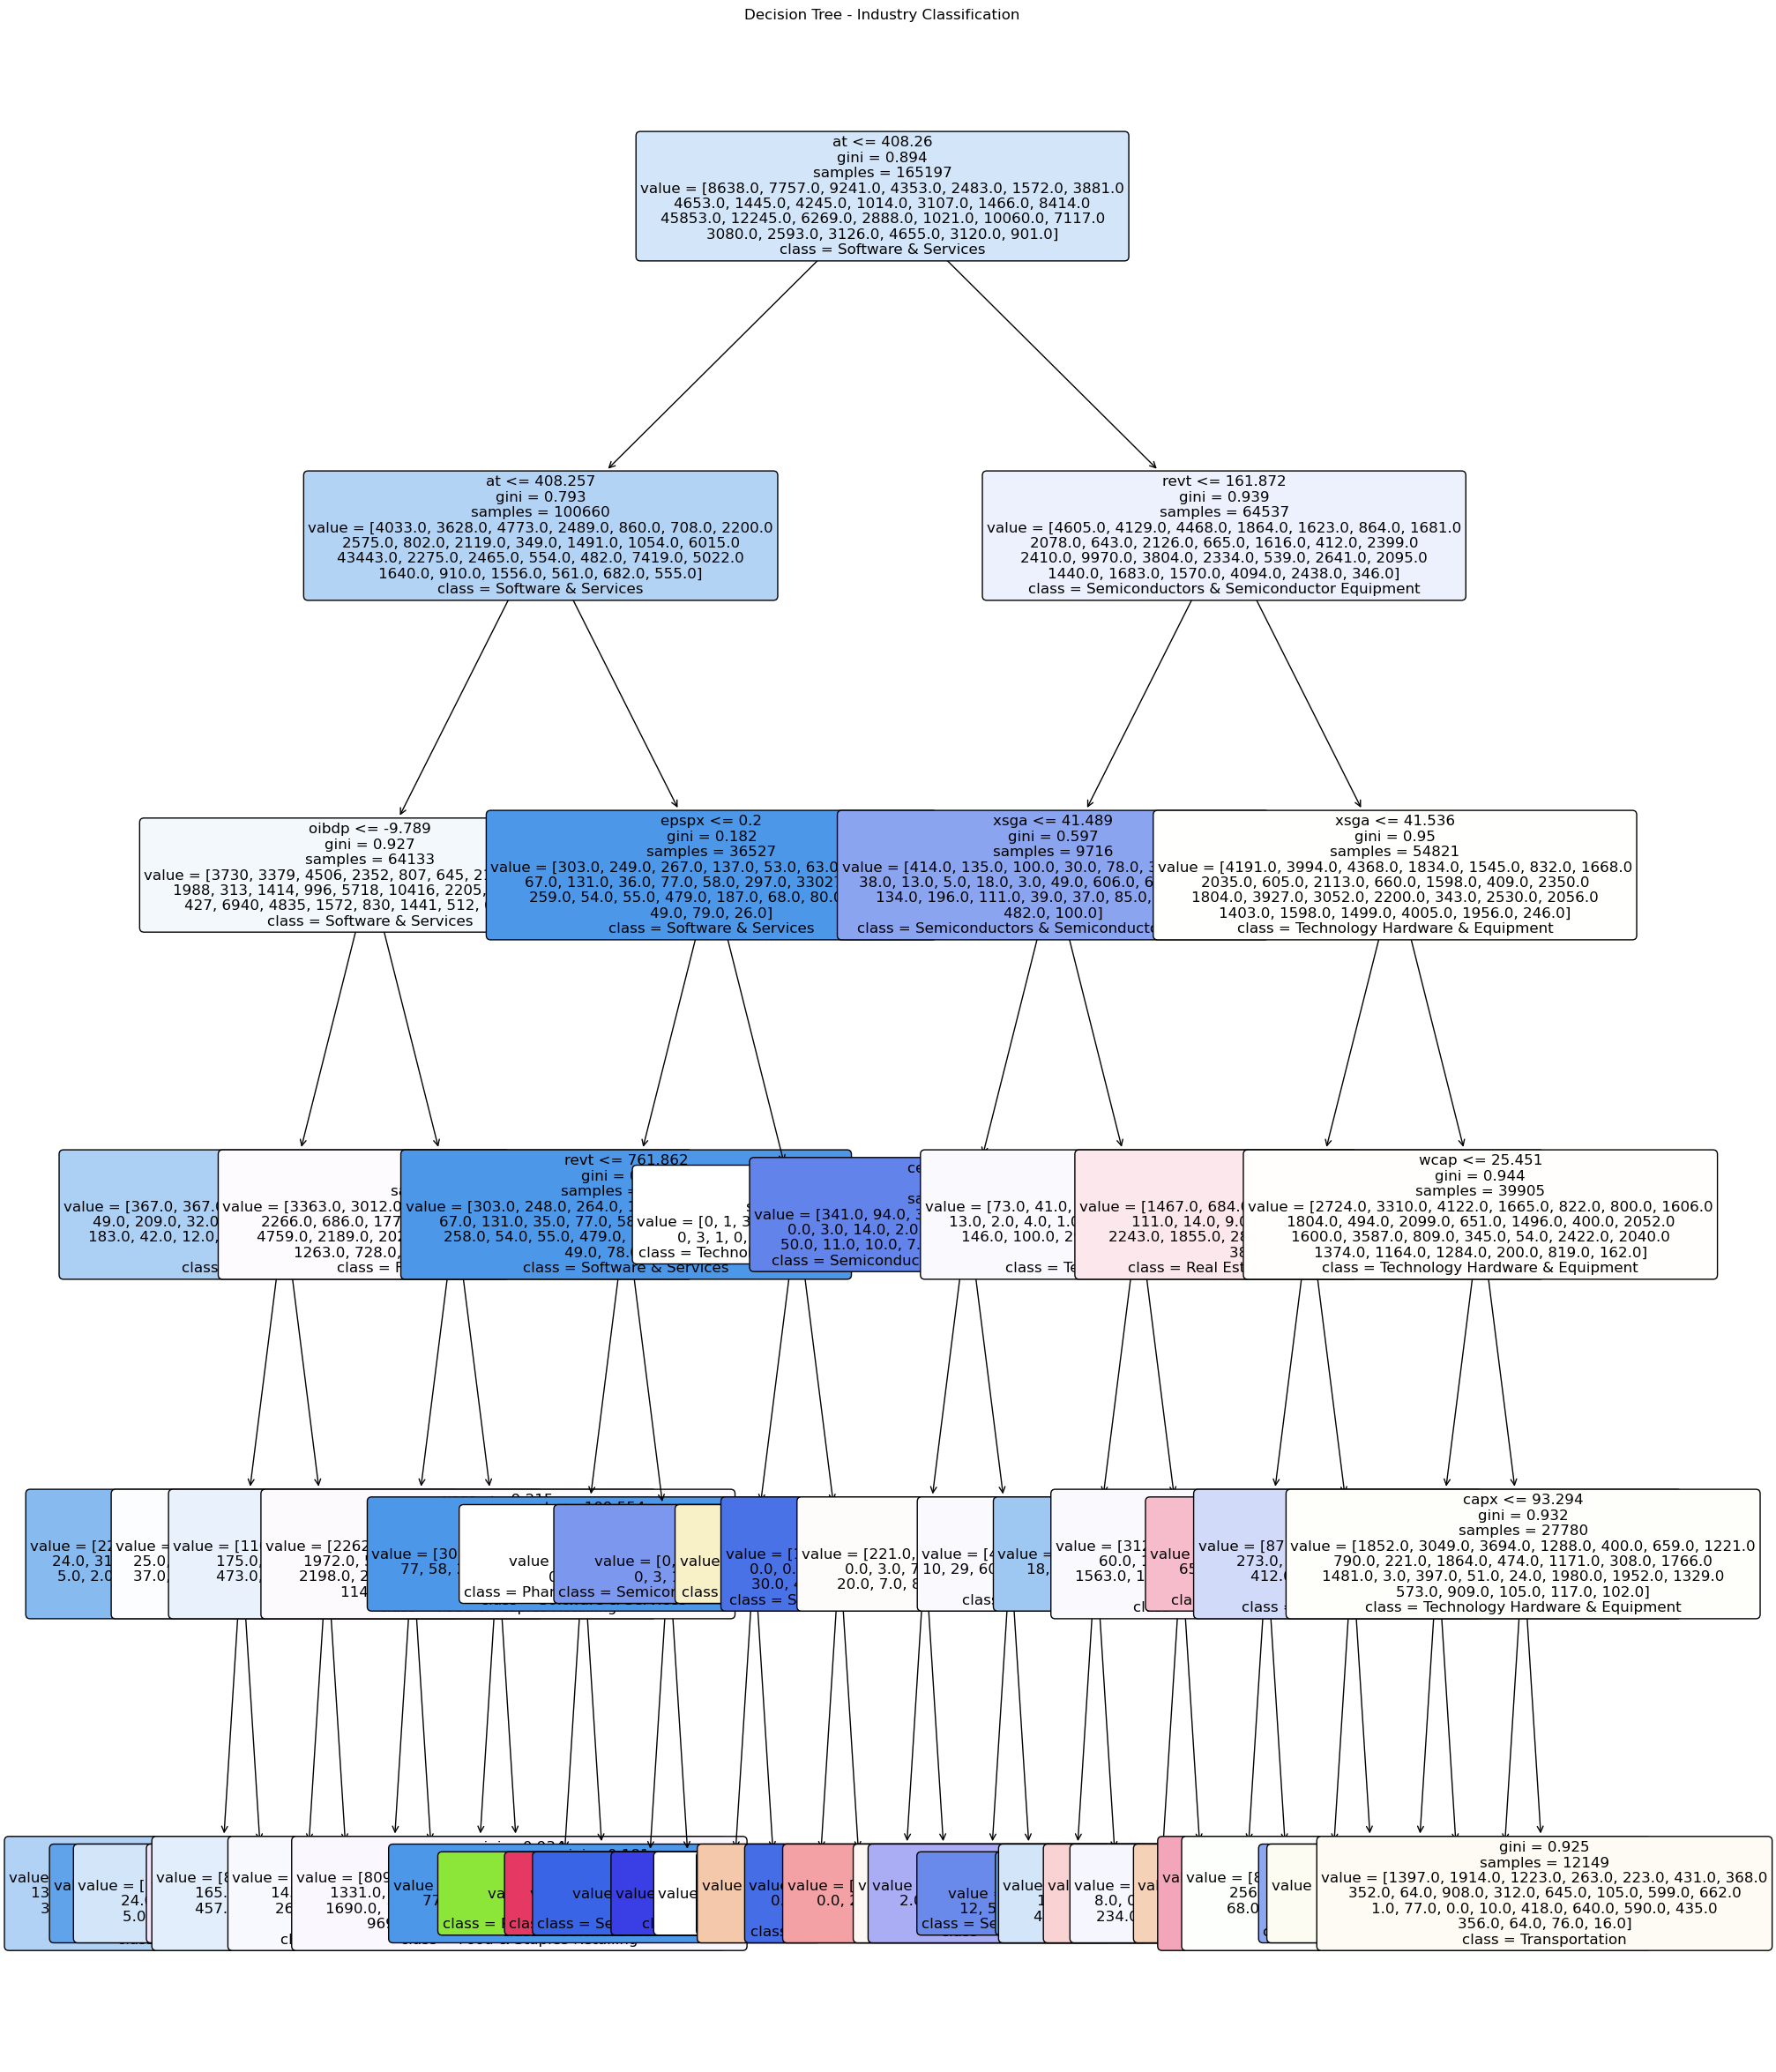

In [93]:
# Visualize the Decision Tree
plt.figure(figsize=(20,30))
plot_tree(
    dtc,
    feature_names=feature_names,
    class_names=target_names,  # Now a list
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Decision Tree - Industry Classification')
plt.show()

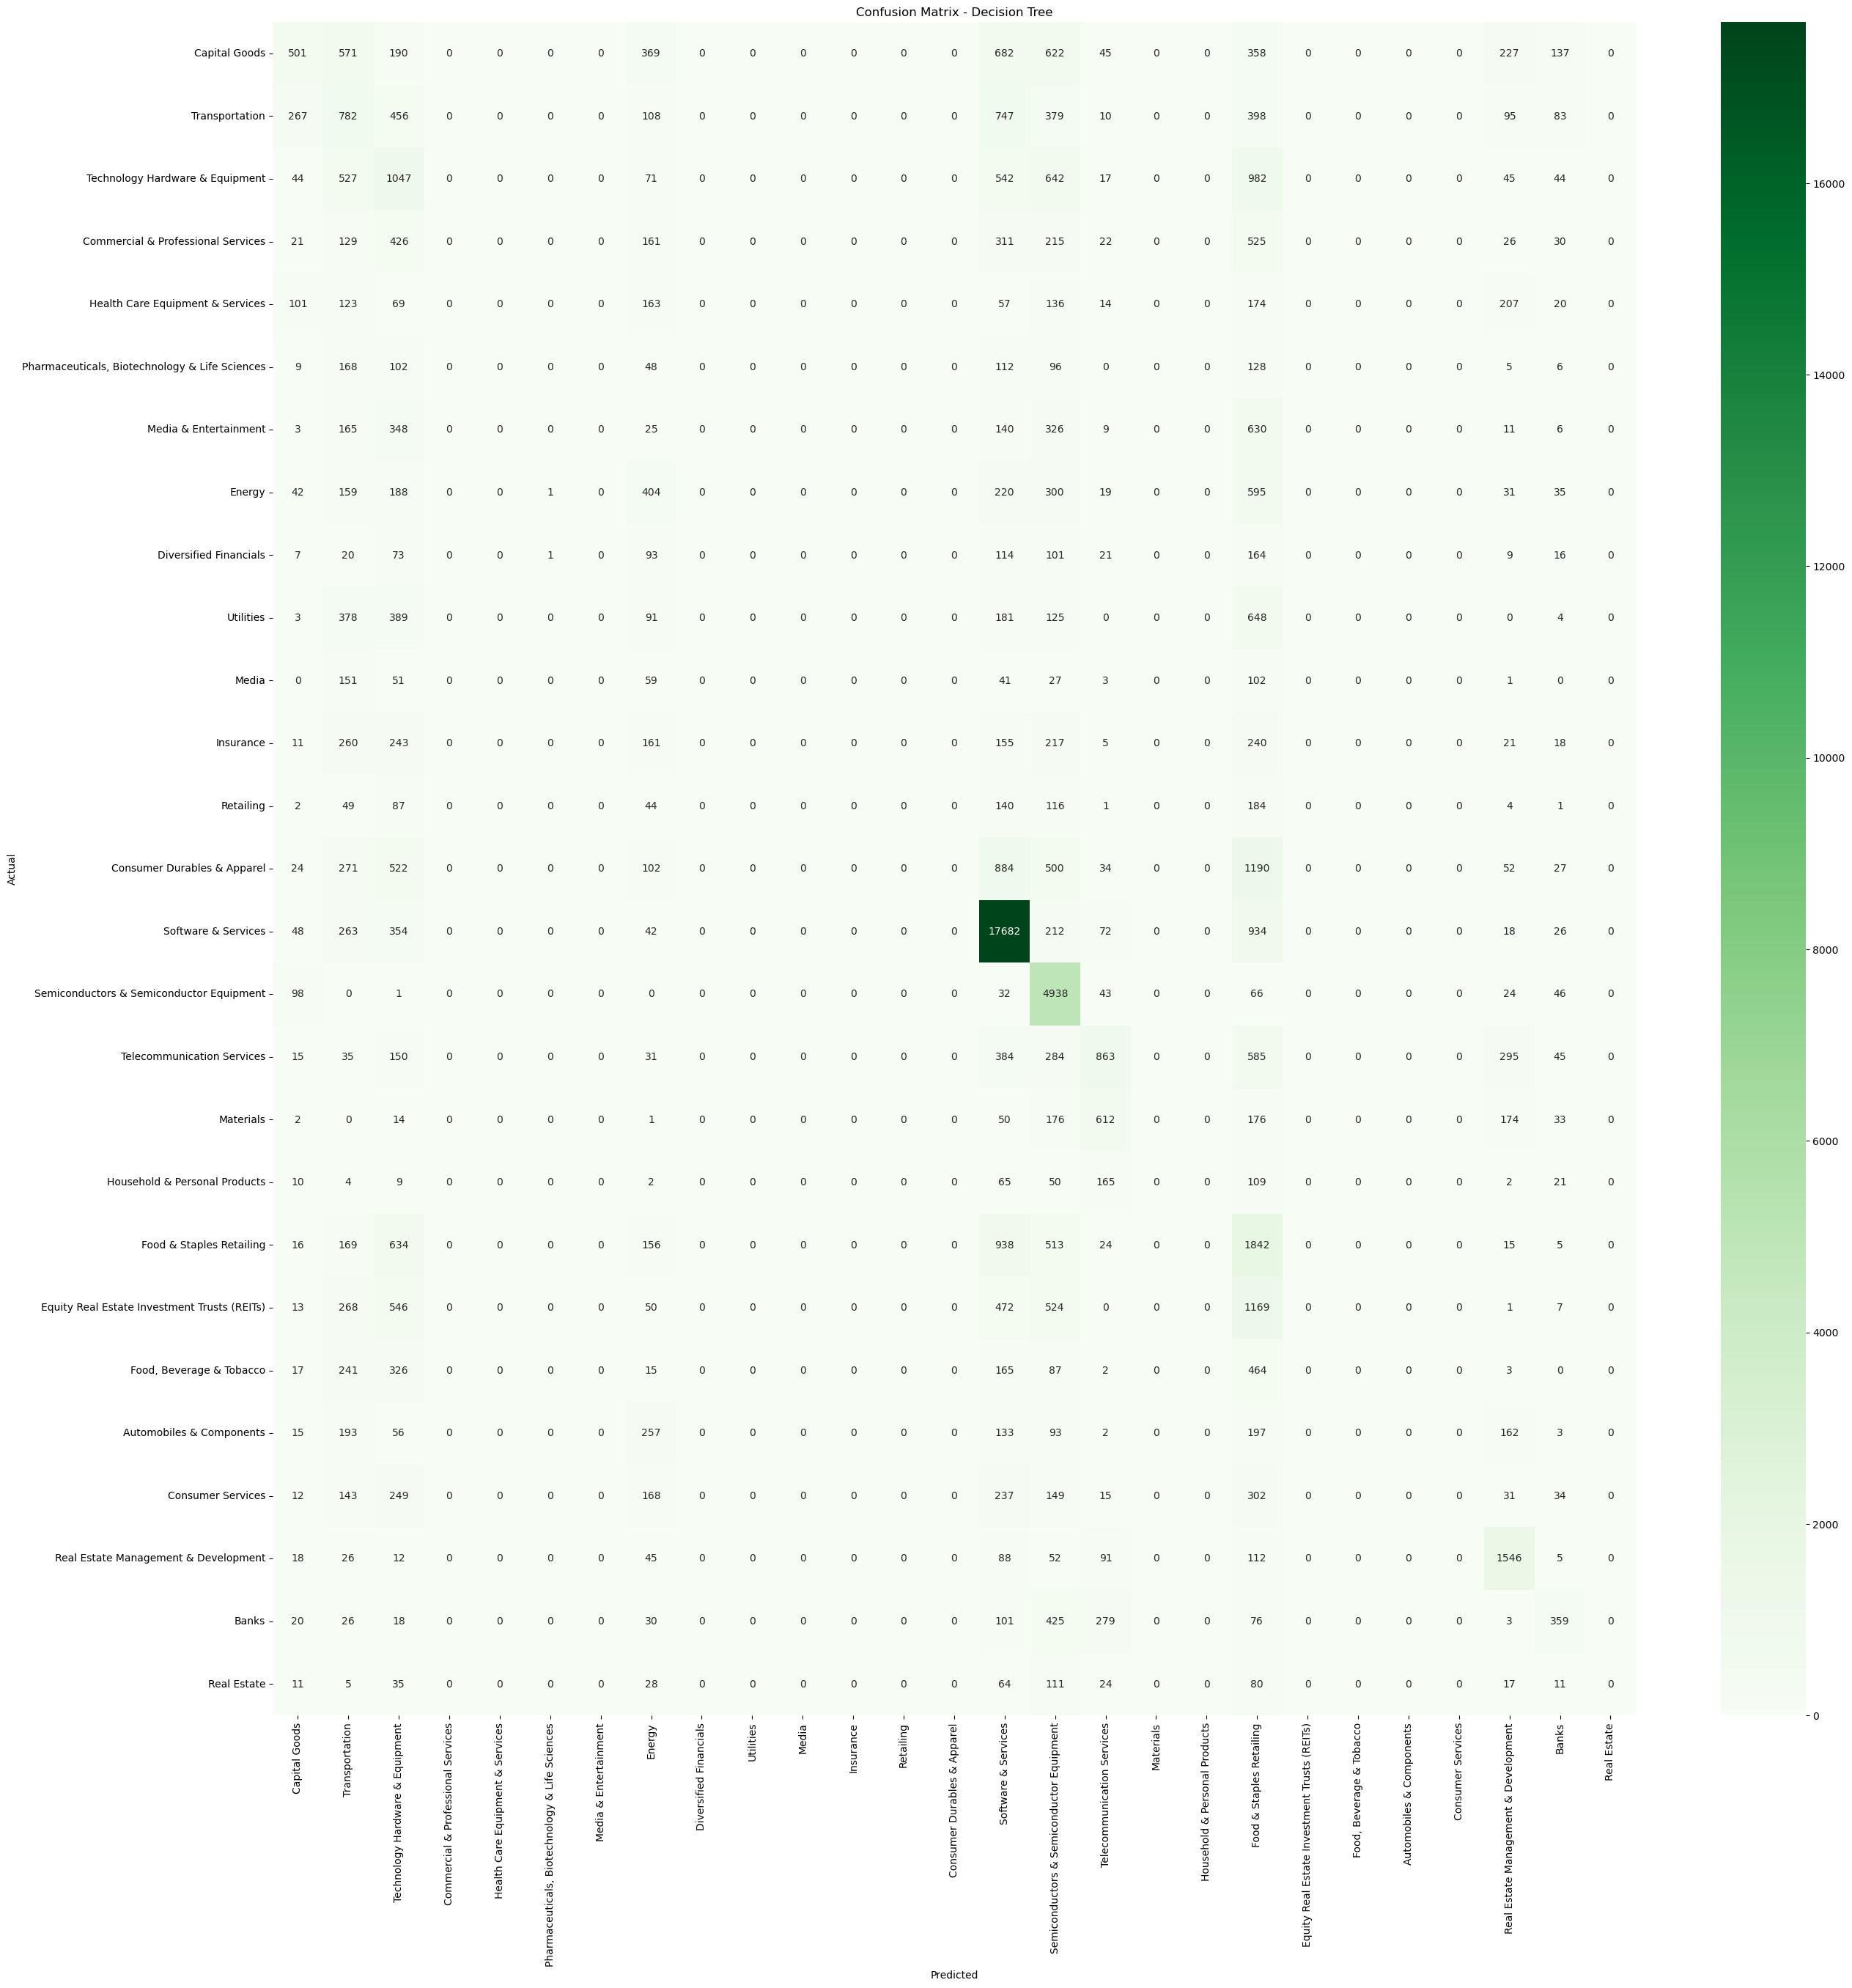

In [99]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.show()